<a href="https://colab.research.google.com/github/MizanMustakim/data_mining_project/blob/main/Data_mining_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import files
# files.upload()

In [1]:
!wget --no-check-certificate \
  https://gtd.terrorismdata.com/app/uploads/_mediavault/2021/02/globalterrorismdb_0221dist.xlsx

--2021-11-27 10:05:49--  https://gtd.terrorismdata.com/app/uploads/_mediavault/2021/02/globalterrorismdb_0221dist.xlsx
Resolving gtd.terrorismdata.com (gtd.terrorismdata.com)... 18.169.202.182
Connecting to gtd.terrorismdata.com (gtd.terrorismdata.com)|18.169.202.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99732895 (95M) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘globalterrorismdb_0221dist.xlsx’

globalterrorismdb_0 100%[===================>]  95.11M  20.8MB/s    in 5.6s    

2021-11-27 10:05:55 (17.0 MB/s) - ‘globalterrorismdb_0221dist.xlsx’ saved [99732895/99732895]



In [ ]:
!pip install pyspark

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_1 = pd.read_excel("/content/globalterrorismdb_0221dist.xlsx")
df_1.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
print(df_1.shape)

(201183, 135)


In [5]:
df_1.columns.tolist()

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [5]:
col_list = ["iyear", "country_txt", "region", "region_txt", "provstate", "attacktype1_txt","success","suicide","weaptype1_txt","targtype1_txt","nkill"]
df_2 = df_1[col_list]

In [6]:
df_2.head()

,iyear,country_txt,region,region_txt,provstate,attacktype1_txt,success,suicide,weaptype1_txt,targtype1_txt,nkill
0,1970,Dominican Republic,2,Central America & Caribbean,National,Assassination,1,0,Unknown,Private Citizens & Property,1.0
1,1970,Mexico,1,North America,Federal,Hostage Taking (Kidnapping),1,0,Unknown,Government (Diplomatic),0.0
2,1970,Philippines,5,Southeast Asia,Tarlac,Assassination,1,0,Unknown,Journalists & Media,1.0
3,1970,Greece,8,Western Europe,Attica,Bombing/Explosion,1,0,Explosives,Government (Diplomatic),NaN
4,1970,Japan,4,East Asia,Fukouka,Facility/Infrastructure Attack,1,0,Incendiary,Government (Diplomatic),NaN


In [9]:
df_2.shape

(201183, 11)

In [8]:
df_2 = df_2.fillna(0)
df_2.head()

,iyear,country_txt,region,region_txt,provstate,attacktype1_txt,success,suicide,weaptype1_txt,targtype1_txt,nkill
0,1970,Dominican Republic,2,Central America & Caribbean,National,Assassination,1,0,Unknown,Private Citizens & Property,1.0
1,1970,Mexico,1,North America,Federal,Hostage Taking (Kidnapping),1,0,Unknown,Government (Diplomatic),0.0
2,1970,Philippines,5,Southeast Asia,Tarlac,Assassination,1,0,Unknown,Journalists & Media,1.0
3,1970,Greece,8,Western Europe,Attica,Bombing/Explosion,1,0,Explosives,Government (Diplomatic),0.0
4,1970,Japan,4,East Asia,Fukouka,Facility/Infrastructure Attack,1,0,Incendiary,Government (Diplomatic),0.0


**Total number of killing on the different regions**

In [35]:
a = df_2.groupby(["region_txt","region", "country_txt", "iyear"])["nkill"].sum().reset_index()
a#.first().head(50)

,region_txt,region,country_txt,iyear,nkill
0,Australasia & Oceania,12,Australia,1970,0.0
1,Australasia & Oceania,12,Australia,1971,0.0
2,Australasia & Oceania,12,Australia,1972,1.0
3,Australasia & Oceania,12,Australia,1974,0.0
4,Australasia & Oceania,12,Australia,1978,2.0
...,...,...,...,...,...
3965,Western Europe,8,West Germany (FRG),1986,9.0
3966,Western Europe,8,West Germany (FRG),1987,2.0
3967,Western Europe,8,West Germany (FRG),1988,1.0
3968,Western Europe,8,West Germany (FRG),1989,5.0


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
a.region_txt.unique()

array(['Australasia & Oceania', 'Central America & Caribbean',
       'Central Asia', 'East Asia', 'Eastern Europe',
       'Middle East & North Africa', 'North America', 'South America',
       'South Asia', 'Southeast Asia', 'Sub-Saharan Africa',
       'Western Europe'], dtype=object)

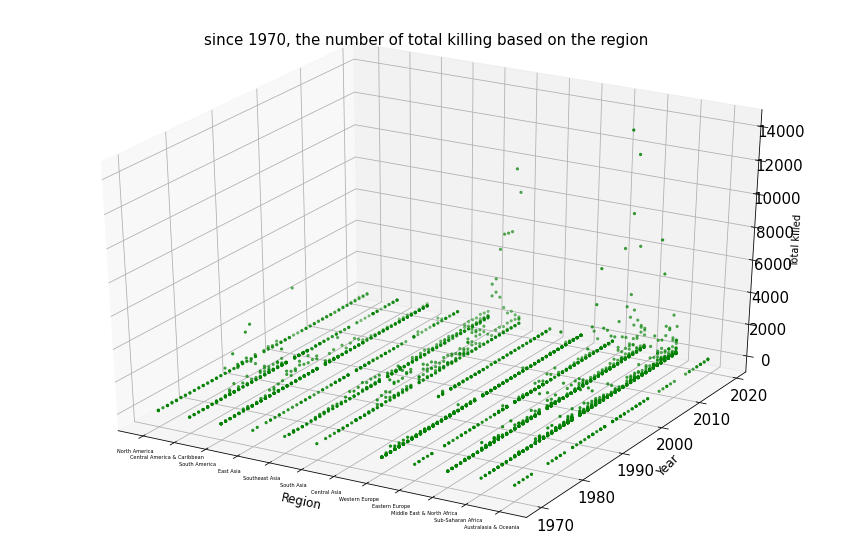

In [14]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection="3d")

plt.rcParams["figure.autolayout"] = True

ax.scatter(a.region, a.iyear, a.nkill, marker=".", c="green")

ax.set_xticks(a.region.unique())
ax.set_xticklabels(a.region_txt.unique(), fontsize=5)

# ax.set_zticklabels([1, "2K", "4K", "6K", "8K", "10K", "12K", "14K"])

ax.set_title("since 1970, the number of total killing based on the region", fontsize=15)

ax.set_xlabel("Region", fontsize=12)

ax.set_ylabel("Year", fontsize=12, rotation= 45)

ax.set_zlabel("Total killed", fontsize=10)

# ax.grid(False)

plt.show()

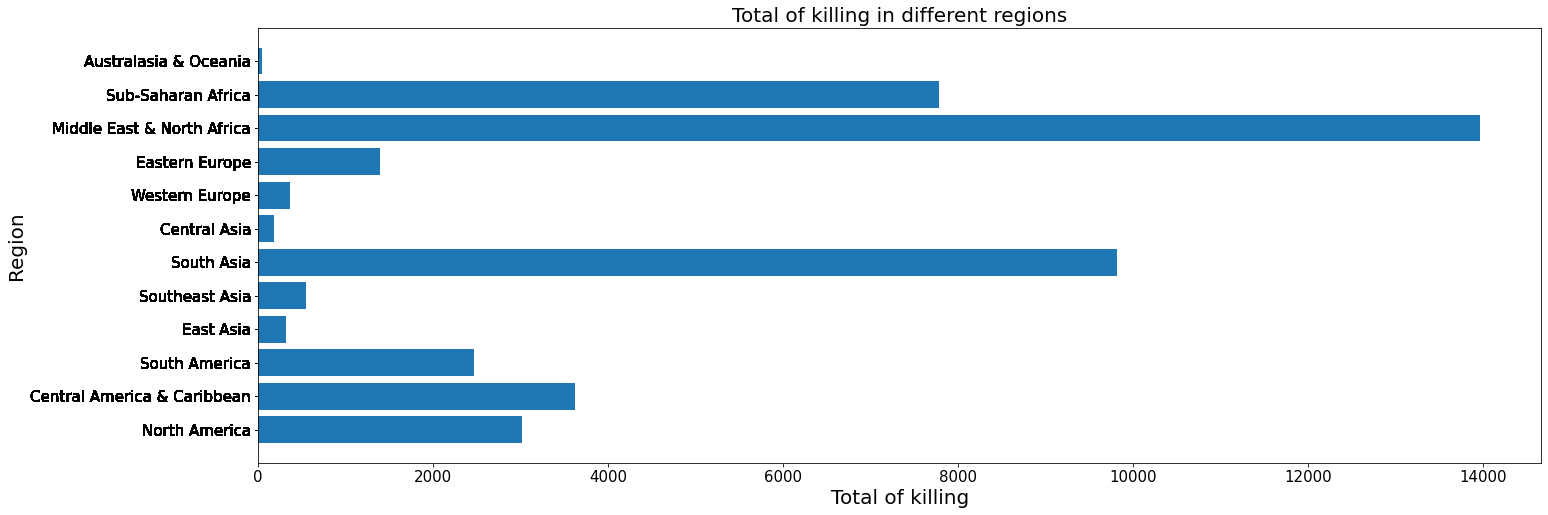

In [13]:
fig = plt.figure(figsize=(23,8))
plt.rcParams.update({'font.size': 15})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=20, titlesize=20)
# plt.xlim( right=max(a.nkill)+1000)
plt.barh(a.region,a.nkill)
plt.yticks(a.region, a.region_txt)
plt.title("Total of killing in different regions")
plt.xlabel("Total of killing")
plt.ylabel("Region")
plt.show()

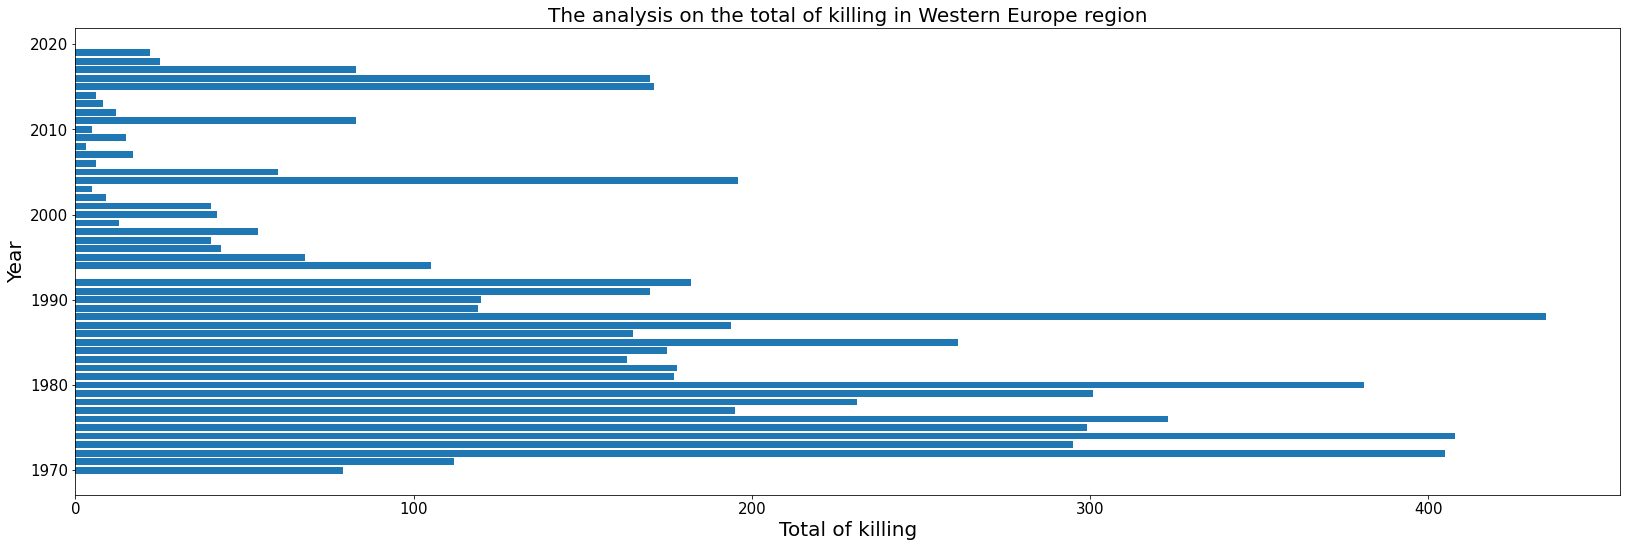

In [61]:
region = "Western Europe" #@param ['Australasia & Oceania', 'Central America & Caribbean','Central Asia', 'East Asia', 'Eastern Europe','Middle East & North Africa', 'North America', 'South America','South Asia', 'Southeast Asia', 'Sub-Saharan Africa','Western Europe']

fig = plt.figure(figsize=(23,8))

b = a[a["region_txt"] == region]
b = b.groupby("iyear")["nkill"].sum().reset_index()
plt.barh(b.iyear, b.nkill)
plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.title("The analysis on the total of killing in {} region".format(region))
plt.xlabel("Total of killing")
plt.ylabel("Year")
plt.show()